# House price Prediction - Feature Engineering

The main aim of this project is to predict the hotel room price based on various features

Dataset to downloaded from the below link

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data


    In the feature engineering part, I:

    Impute missing values
    Outliers
    modify the columns
    Temporal variables
    Manage categorical variables

In [1]:
# import the package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import yeojohnson, skew, boxcox 
from sklearn.preprocessing import LabelEncoder

In [2]:
# import the dataSet 
dataSet = pd.read_csv('hotel_bookings.csv')

In [3]:
dataSet.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# There having 119390 rows and 32 columns
dataSet.shape

(119390, 32)

In [5]:
df = dataSet.copy()

In [6]:
# Totally 31994 dublicate rows in the dataSet
df[df.duplicated()].shape

(31994, 32)

In [7]:
# I droped the dublicate values in the dataSet
df.drop_duplicates(inplace= True)
df.shape

(87396, 32)

# Missing values

In [8]:
# In these four columns, missing values are present.

pd.DataFrame(df.isna().sum().sort_values(ascending = False)).head(4) 

,0
company,82137
agent,12193
country,452
children,4


In [9]:
# children
# observation of the data has no children, so I put 0
df['children'].fillna(0, inplace=True)

In [10]:
# company
# The company columns have 0.9431% of data as NaN, so I will drop the column
df.drop(columns='company', inplace=True)

In [11]:
# In the 'agent' column, I replace the median value of the missing data

df.fillna(df["agent"].median(),inplace=True)

In [12]:
df.shape

(87396, 31)

In [13]:
# finally, there is no missing values in the observation

pd.DataFrame(df.isna().sum().sort_values(ascending = False)).head(4) 

,0
hotel,0
is_repeated_guest,0
reservation_status,0
total_of_special_requests,0


In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Outliers

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87396.0,0.138633,0.455871,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


    "The 'adr' and 'lead_time' columns have highly skewed max values, indicating the     presence of outliers. Remove the outliers.

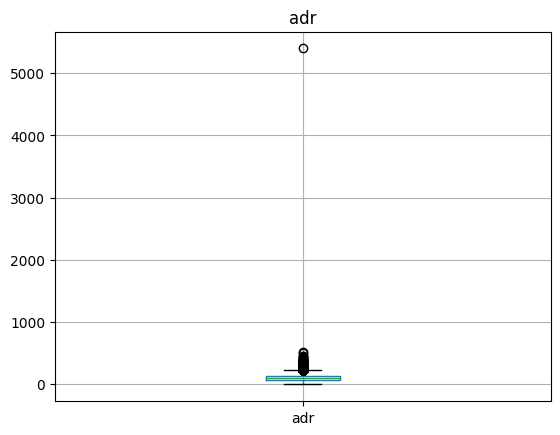

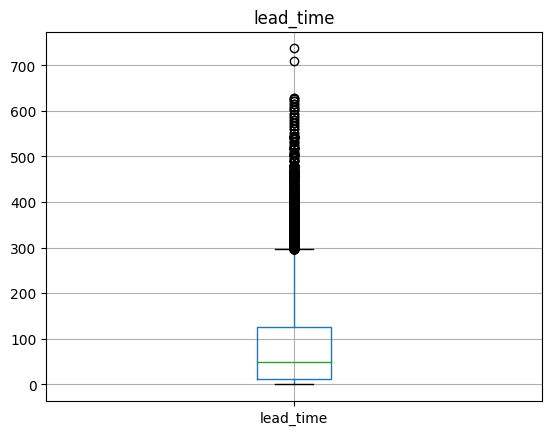

In [16]:
for feature in ['adr', 'lead_time']:
    df.boxplot(column= feature)
    plt.title(feature)
    plt.show() 

In [17]:
# In the 'adr' column, remove the data points that are greater than 50 or less than 5000

df = df[(df['adr'] > 50) & (df['adr'] < 5000)]

In [18]:
df = df.drop(df.query('lead_time > 700').index)

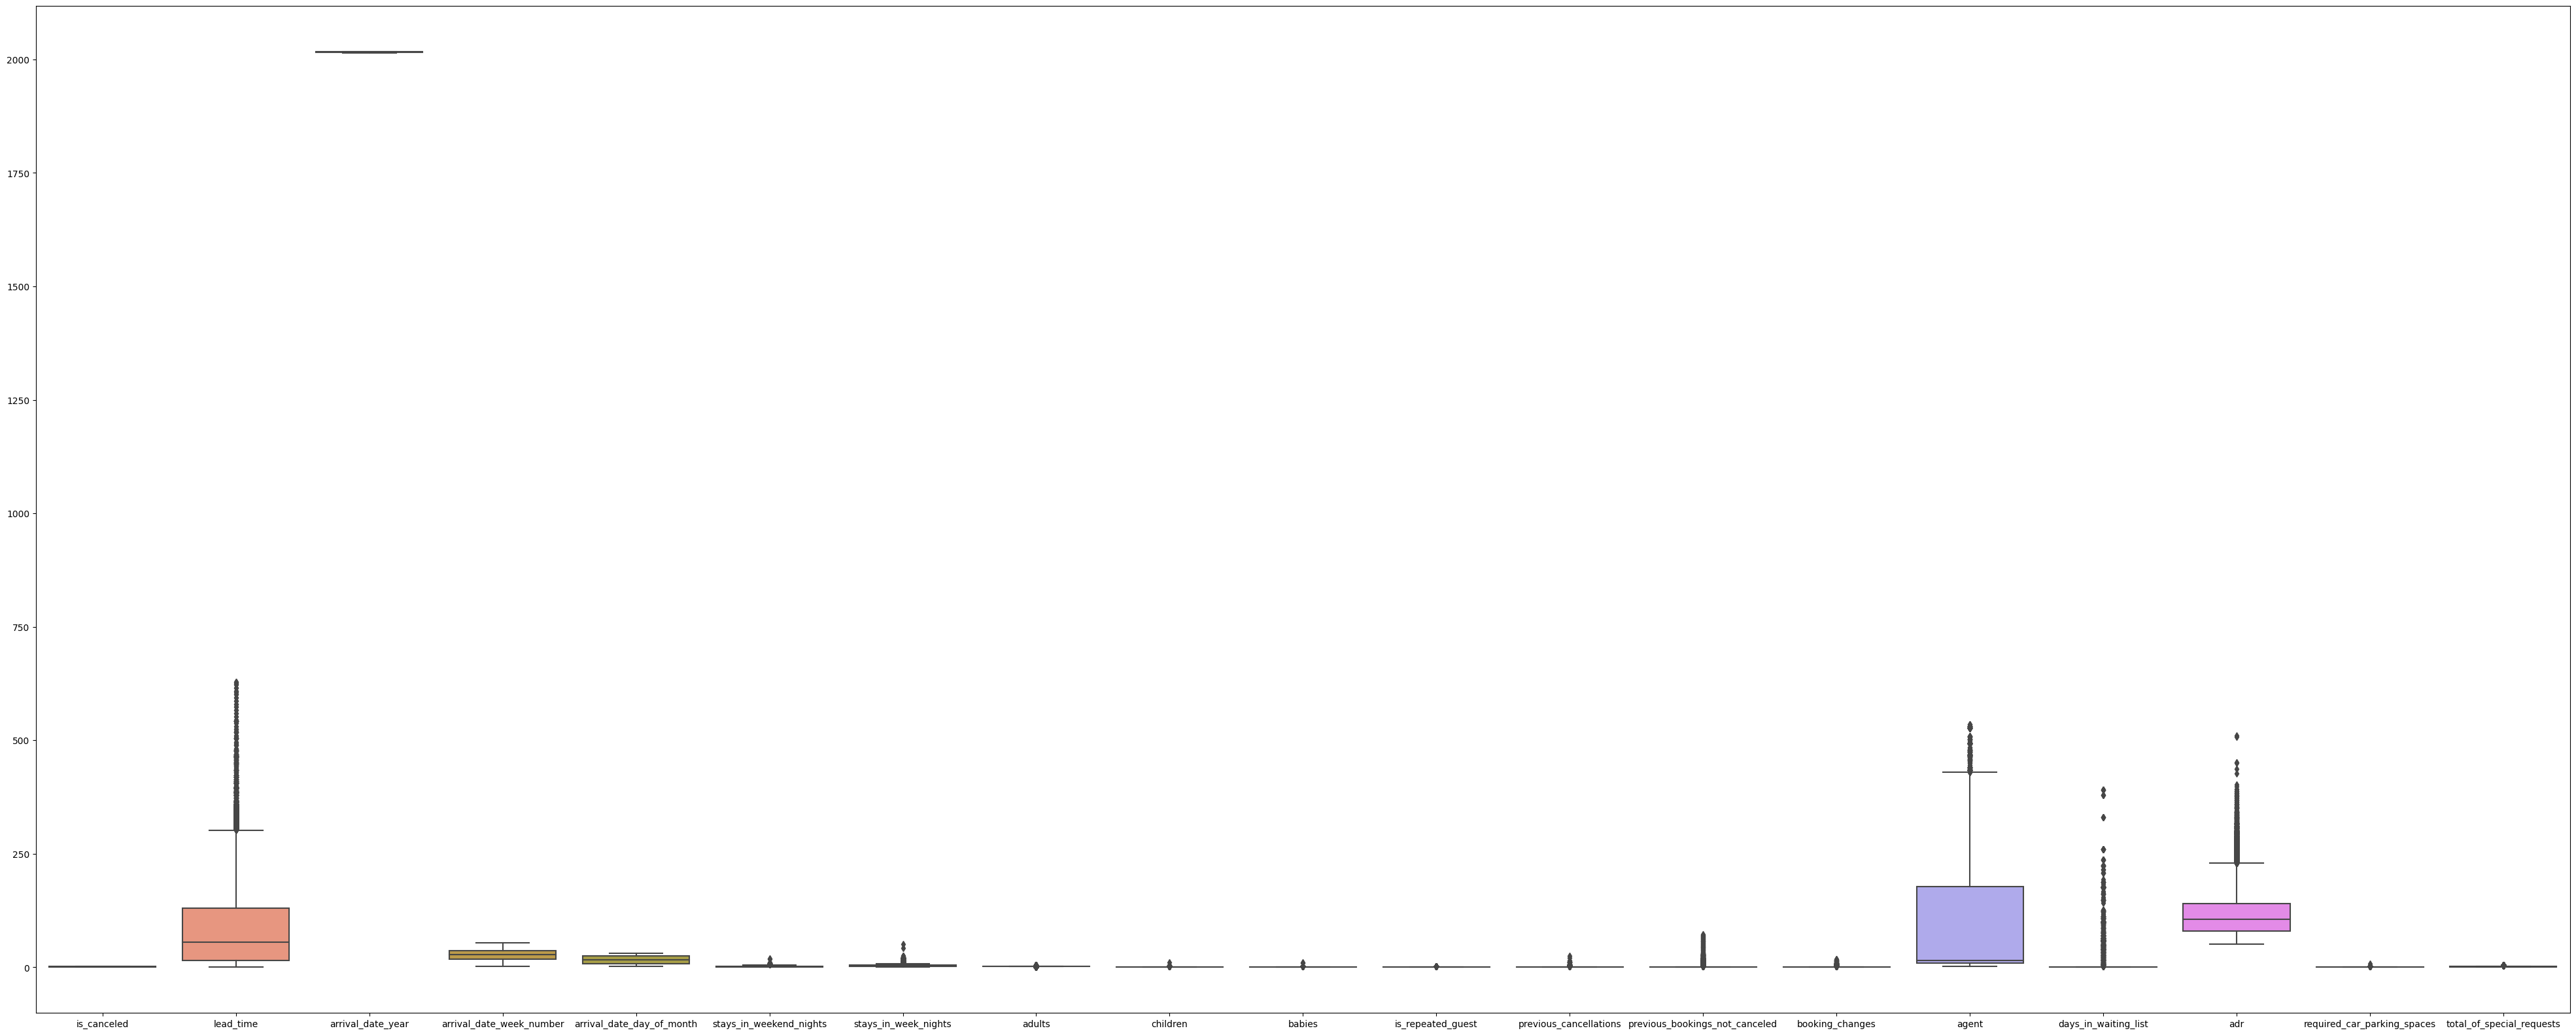

In [19]:
plt.figure(figsize=(50, 20))
sns.boxplot(data = df)
plt.show()

# modify the columns

 In feature engineering, add a new column that consolidates relevant information into a single      column based on the problem statement.

In [20]:
# stays_in_week_nights and stays_in_weekend_nights convert to totalStayNights
df['totalStayNights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# adults, children, babies convert to total person
df['totalPerson'] = df['adults'] + df['children'] + df['babies']

In [21]:
# I drop these columns as they are all unwanted for the prediction.

In [22]:
# drop columns

df = df.drop(
                [
                    "is_canceled",
                    "arrival_date_week_number",
                    "distribution_channel",
                    "is_repeated_guest",
                    "previous_cancellations",
                    "previous_bookings_not_canceled",
                    "booking_changes",
                    "agent",
                    "reservation_status",
                    "reservation_status_date",
                    "stays_in_week_nights",
                    "stays_in_weekend_nights",
                    "adults","children","babies","country"
                ],axis=1
            )

In [23]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
lead_time,77536.0,83.648911,86.180389,0.00,15.0,55.0,130.0,629.0
arrival_date_year,77536.0,2016.231750,0.680952,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_day_of_month,77536.0,15.843092,8.849198,1.00,8.0,16.0,24.0,31.0
days_in_waiting_list,77536.0,0.774621,10.251501,0.00,0.0,0.0,0.0,391.0
adr,77536.0,115.733564,47.114094,50.02,80.1,105.3,139.5,510.0
required_car_parking_spaces,77536.0,0.083213,0.279132,0.00,0.0,0.0,0.0,8.0
total_of_special_requests,77536.0,0.723212,0.838172,0.00,0.0,1.0,1.0,5.0
totalStayNights,77536.0,3.685462,2.634310,1.00,2.0,3.0,5.0,69.0
totalPerson,77536.0,2.075965,0.700409,0.00,2.0,2.0,2.0,12.0


# Temporary variables

In [24]:
# Temporay variable are date, time, year
temporayFeature = [feature for feature in df.columns[df.columns.str.contains('arrival')]]

In [25]:
# These columns are all temporary variables
temporayFeature

['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']

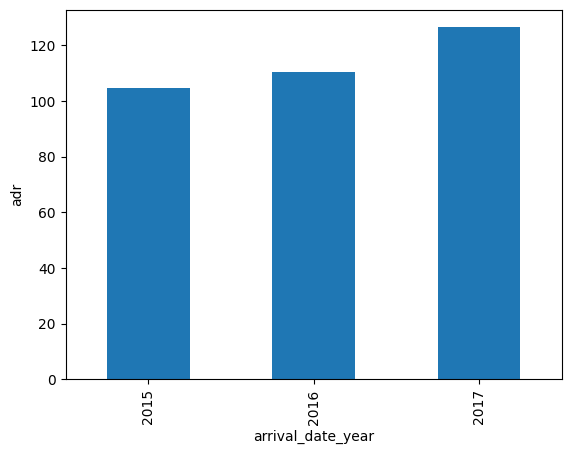

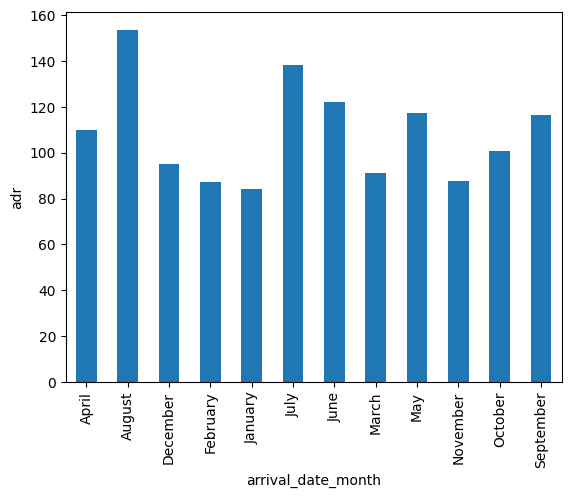

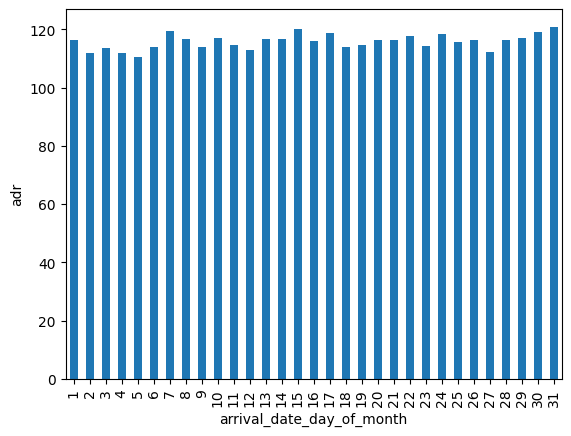

In [26]:
# cross check with the adr colums to see the difference
for feature in temporayFeature:
    df.groupby(df[feature])['adr'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('adr')
    plt.show()

# Categorical 

In [27]:
# Detect all the categorical features
categoricalFeature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [28]:
df[categoricalFeature].head()

,hotel,arrival_date_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,customer_type
2,Resort Hotel,July,BB,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,Online TA,A,A,No Deposit,Transient
6,Resort Hotel,July,BB,Direct,C,C,No Deposit,Transient
7,Resort Hotel,July,FB,Direct,C,C,No Deposit,Transient


In [29]:
# Assign the LabelEncoder to convert categorical data to numerical values.
lableEncoder = LabelEncoder()

In [30]:
df['hotel'] = lableEncoder.fit_transform(df['hotel'])
df['arrival_date_month'] = lableEncoder.fit_transform(df['arrival_date_month'])
df['meal'] = lableEncoder.fit_transform(df['meal'])
df['market_segment'] = lableEncoder.fit_transform(df['market_segment'])
df['reserved_room_type'] = lableEncoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = lableEncoder.fit_transform(df['assigned_room_type'])
df['deposit_type'] = lableEncoder.fit_transform(df['deposit_type'])
df['customer_type'] = lableEncoder.fit_transform(df['customer_type'])

In [31]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
2,1,7,2015,5,1,0,3,0,2,0,0,2,75.0,0,0,1,1.0
3,1,13,2015,5,1,0,2,0,0,0,0,2,75.0,0,0,1,1.0
4,1,14,2015,5,1,0,6,0,0,0,0,2,98.0,0,1,2,2.0
6,1,0,2015,5,1,0,3,2,2,0,0,2,107.0,0,0,2,2.0
7,1,9,2015,5,1,1,3,2,2,0,0,2,103.0,0,1,2,2.0


In [32]:
# recheck the dublicate values is present or not
df[df.duplicated()].shape

(3394, 17)

In [33]:
# remove the dublicate values
df.drop_duplicates(inplace=True)

In [34]:
# reset the index and drop
df = df.reset_index()
df.drop(columns='index', inplace=True)

In [35]:
df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,reserved_room_type,assigned_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,totalStayNights,totalPerson
0,1,7,2015,5,1,0,3,0,2,0,0,2,75.0,0,0,1,1.0
1,1,13,2015,5,1,0,2,0,0,0,0,2,75.0,0,0,1,1.0
2,1,14,2015,5,1,0,6,0,0,0,0,2,98.0,0,1,2,2.0
3,1,0,2015,5,1,0,3,2,2,0,0,2,107.0,0,0,2,2.0
4,1,9,2015,5,1,1,3,2,2,0,0,2,103.0,0,1,2,2.0


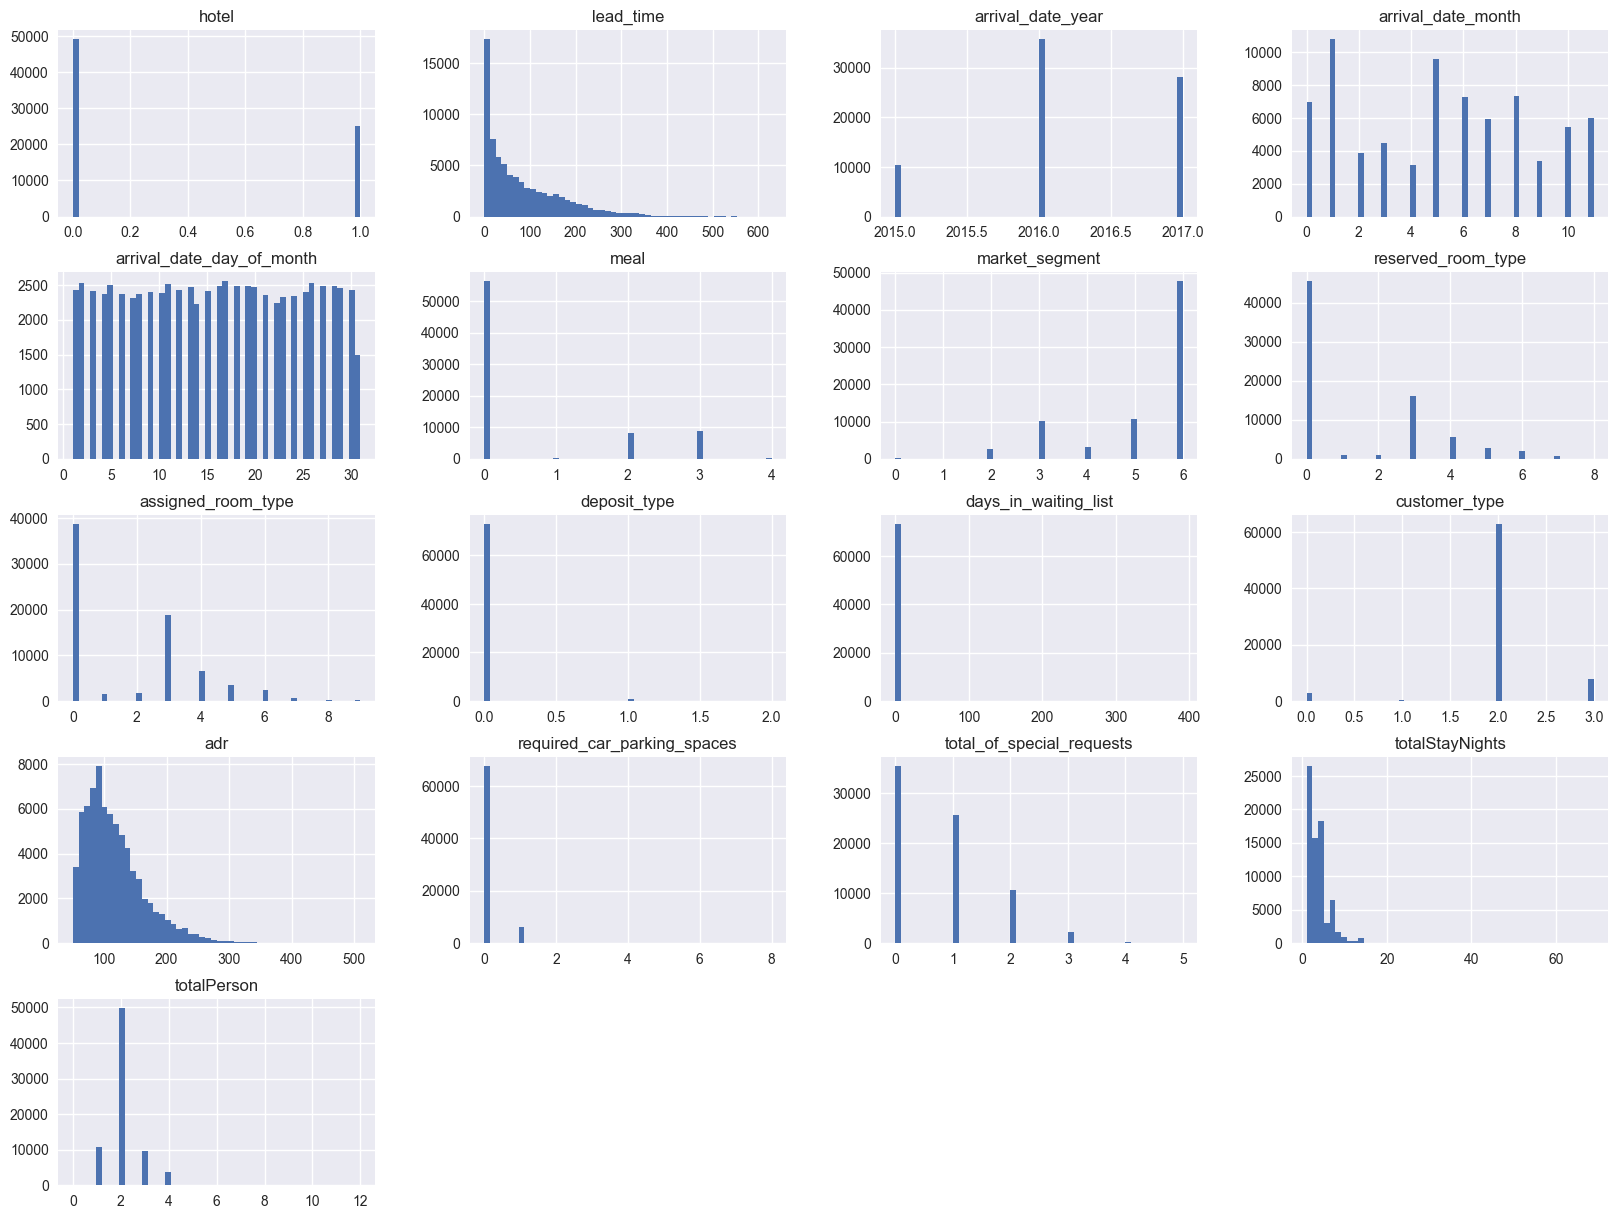

In [36]:
# Visualize all the columns at once.
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [37]:
#  Finally, save the data to a CSV file.
df.to_csv('hotelPriceCleaned.csv',index=False)